# Q1

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from collections import Counter

In [36]:
class Node:
    def __init__(self):
        self.predicted_class = None
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.isLeaf = None

    # for Q2.7
    def size(self):
        if self.isLeaf:
            return 1
        else:
            return 1 + self.left.size() + self.right.size()

In [37]:
#H(Y) = -Sum(P(y)*log2(P(y))
def entropy(Y_column):
    total = Y_column.count()
    if total == 0:
        return 0.0
    value_1_count = Y_column.sum()
    p_1 = value_1_count/total
    p_0 = 1- p_1
    if p_1 == 0 or p_0 ==0:
        return 0.0
    return -(p_1)*np.log2(p_1) -(p_0)*np.log2(p_0)

In [38]:
def candidateNumericSplits(dataSet, feature):
    C = []
    sortData = dataSet.sort_values(by = feature).reset_index(drop=True)
    sortData["differentY"] = sortData["y"].shift()
    sortData["differentY2"] = sortData["y"].shift(-1)
    for i, row in sortData.iterrows():
        if i==0:
            if row["y"] != row["differentY2"]:
                if row[feature] not in C:
                    C.append(row[feature])
        elif i == len(sortData)-1:
            if row["y"] != row["differentY"]:
                if row[feature] not in C:
                    C.append(row[feature])
        else:
            if(row["differentY"] != row["y"] or row["differentY2"] != row["y"]): 
                if row[feature] not in C:
                    C.append(row[feature])
    return C

In [39]:
def Information_gain_ratio(dataSet, feature, threshold):
    dataSetR = dataSet[dataSet[feature]>=threshold]
    dataSetL = dataSet[dataSet[feature]<threshold]
    entropyR = entropy(dataSetR["y"])
    entropyL = entropy(dataSetL["y"])
    probR = dataSetR["y"].count() / dataSet["y"].count()
    probL = 1- probR
    if probR==0 or probL==0:
        return 0.0
    infoGain = entropy(dataSet["y"]) -probL*entropyL - probR*entropyR
    splitInfo = -(probR)*np.log2(probR) - probL*np.log2(probL)
    if splitInfo ==0:
        return 0.0
    return infoGain/splitInfo

In [40]:
# for Q2 questions
def infoGain(dataSet, feature, threshold):
    dataSetR = dataSet[dataSet[feature]>=threshold]
    dataSetL = dataSet[dataSet[feature]<threshold]
    entropyR = entropy(dataSetR["y"])
    entropyL = entropy(dataSetL["y"])
    probR = dataSetR["y"].count() / dataSet["y"].count()
    probL = 1- probR
    if probR==0 or probL==0:
        return 0.0
    infoGain = entropy(dataSet["y"]) -probL*entropyL - probR*entropyR
    return infoGain
def splitInfo(dataSet, feature, threshold):
    dataSetR = dataSet[dataSet[feature]>=threshold]
    dataSetL = dataSet[dataSet[feature]<threshold]
    entropyR = entropy(dataSetR["y"])
    entropyL = entropy(dataSetL["y"])
    probR = dataSetR["y"].count() / dataSet["y"].count()
    probL = 1- probR
    if probR==0 or probL==0:
        return 0.0
    infoGain = entropy(dataSet["y"]) -probL*entropyL - probR*entropyR
    splitInfo = -(probR)*np.log2(probR) - probL*np.log2(probL)
    return splitInfo

In [41]:
def makeSubtree(dataSet):
    # create node for the current dataSet
    node = Node()
    
    # Check if meet the stop criteria
    # when the dataSet is empty and all label are same(then empty in candidateNumericSplits Set)
    if(len(dataSet["y"]) == 0 or len(np.unique(dataSet["y"])) == 1):
        node.isLeaf = True
        if len(dataSet["y"]) ==0:
            node.predicted_class = 1
        else:
            node.predicted_class = dataSet["y"][0]
        return node
    
    C_x1 = candidateNumericSplits(dataSet,"x1")
    C_x2 = candidateNumericSplits(dataSet,"x2")
    
    #loop through two features's all candiate splits then find the largest threshold
    maxGainRatio = -1
    best_feature = None
    best_threshold = None
    
    for c1 in C_x1:
        gainRatio = Information_gain_ratio(dataSet,"x1",c1)
        if(gainRatio > maxGainRatio):
            best_feature = "x1"
            maxGainRatio = gainRatio
            best_threshold = c1

    for c2 in C_x2:
        gainRatio = Information_gain_ratio(dataSet,"x2",c2)
        if(gainRatio > maxGainRatio):
            best_feature = "x2"
            maxGainRatio = gainRatio
            best_threshold = c2
    

    # the entropy of any candidates split is zero or all splits have zero gain ratio
    if maxGainRatio == 0:
        node.isLeaf = True
        if dataSet["y"].mean() >=0.5:
            node.predicted_class =1
        else:
            node.predicted_class =0
        return node
    
    # then mark the node's information and make the recursive subtree
    node.threshold = best_threshold
    node.isLeaf = False
    if best_feature =="x1":
        node.feature_index = 0
    elif best_feature =="x2":
        node.feature_index = 1
  
    
    dataSetR = dataSet[dataSet[best_feature]>=best_threshold].reset_index(drop=True)
    dataSetL = dataSet[dataSet[best_feature]<best_threshold].reset_index(drop=True)
    node.left = makeSubtree(dataSetL)
    node.right = makeSubtree(dataSetR)
    return node

# Q2

1. Yes, because our algorithm will not be able to find any candidates for next split. So, it must be a leaf.

2. Say we have data set containning four data points: [0,0,1], [1,1,0],[0,1,0],[1,0,0].

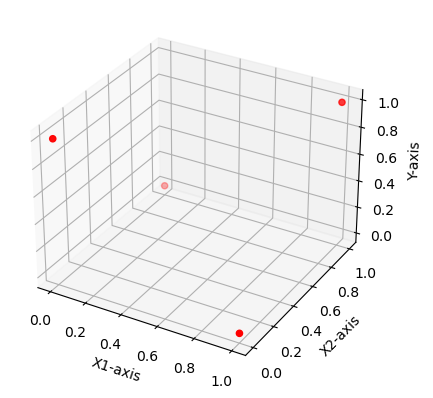

In [42]:
node = makeSubtree(pd.DataFrame([[0,0,1], [1,1,1],[0,1,0],[1,0,0]], columns=["x1","x2", "y"]))
# Define the coordinates of the points
x1 = [0, 1, 0, 1]
x2 = [0, 1, 1, 0]
y = [1, 1, 0, 0]

# Create a 3D scatter plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, y, c='r', marker='o')

# Set labels for the axes
ax.set_xlabel('X1-axis')
ax.set_ylabel('X2-axis')
ax.set_zlabel('Y-axis')

# Show the plot
plt.show()

In [43]:
node.isLeaf

True

So, we can see that this node is a leaf node. This is because our algorithm can only find splits that has zero gain ratio, which makes this node a leaf node. However, when we manually force it to split using x1 as the threshould feature, say we have two subnodes containning [0,0.1],[0,1,0] and [1,0,0],[1,1,0].

In [44]:
makeSubtree(pd.DataFrame([[0,0,1], [0,1,0]], columns=["x1","x2", "y"])).isLeaf

False

In [45]:
makeSubtree(pd.DataFrame([[1,1,1],[1,0,0]], columns=["x1","x2", "y"])).isLeaf

False

We can see the splitted data set is not leaf node and will be further split. It is because when our algorithm can generate a positive gain ratio when it further splits two data points into two nodes.

3.

In [46]:
trainFile = "./Homework 2 data/Druns.txt"
trainData = pd.read_csv(trainFile, sep=" ", names= ["x1","x2","y"])

features = ["x1", "x2"]  # List of attributes

for attr in features:
    for cut in candidateNumericSplits(trainData, attr):
        ig_ratio = Information_gain_ratio(trainData, attr, cut)
        if ig_ratio == 0:
            info_gain = infoGain(trainData, attr, cut)
            split_entropy = splitInfo(trainData, attr, cut)
            print(f"{attr} has candidate cut {cut} with information gain ratio 0. Information gain: {info_gain} and entropy of the split: {split_entropy}")
        else:
            print(f"{attr} has candidate cut {cut} with information gain ratio: {ig_ratio}")

x1 has candidate cut 0.0 with information gain ratio 0. Information gain: 0.0 and entropy of the split: 0.0
x1 has candidate cut 0.1 with information gain ratio: 0.10051807676021828
x2 has candidate cut -2.0 with information gain ratio 0. Information gain: 0.0 and entropy of the split: 0.0
x2 has candidate cut -1.0 with information gain ratio: 0.10051807676021828
x2 has candidate cut 0.0 with information gain ratio: 0.055953759631263686
x2 has candidate cut 5.0 with information gain ratio: 0.11124029586339806
x2 has candidate cut 6.0 with information gain ratio: 0.23609960614360798
x2 has candidate cut 7.0 with information gain ratio: 0.055953759631263755
x2 has candidate cut 8.0 with information gain ratio: 0.4301569161309807


4.

In [47]:
def printTree(node, level=0, RootLR=0): #root:0, left:1, right 2
    if node.isLeaf == False:
        feature_name = "x1" if node.feature_index == 0 else "x2"
        if RootLR==0:
            printTree(node.right, level + 1,2)
            print(' ' * 8 * level + str(feature_name)+"≥"+str(node.threshold))
            printTree(node.left, level + 1,1)
        elif RootLR==1:
            printTree(node.right, level + 2,2)
            print(' ' * 8 * level + '-False-> '+ str(feature_name)+"≥"+str(node.threshold))
            printTree(node.left, level + 2,1)
        elif RootLR==2:    
            printTree(node.right, level + 2,2)
            print(' ' * 8 * level + '-True-> '+ str(feature_name)+"≥"+str(node.threshold))
            printTree(node.left, level + 2,1)        
    else:
        if RootLR == 0:
            print(' ' * 8 * level + 'y=' + str(node.predicted_class))
        if RootLR == 1:
            print(' ' * 8 * level + '-False->|y=' + str(node.predicted_class))
        if RootLR == 2:
            print(' ' * 8 * level + '-True->|y=' + str(node.predicted_class))        

D3leavesFile = "./Homework 2 data/D3leaves.txt"
D3leavesData = pd.read_csv(D3leavesFile, sep=" ", names= ["x1","x2","y"])
D3root = makeSubtree(D3leavesData)
printTree(D3root)


        -True->|y=1
x2≥2.0
                        -True->|y=1
        -False-> x1≥10.0
                        -False->|y=0


The decision tree built on D3leaves.txt is above. When evaluating a data point [X1, X2, Y] from left to right in the tree, the following rules apply:
1. If X2 ≥ 2 is true, the data point follows the true branch, resulting in Y = 1.
2. If X2 ≥ 2 is false, the data point proceeds down the false branch, where it encounters the second threshold.
3. Following 2, if X1 ≥ 10 is true for our data point, then Y = 1; otherwise, Y = 0.

5.

In [48]:
#Build a decision tree on D1.txt. 
D1File = "./Homework 2 data/D1.txt"
D1 = pd.read_csv(D1File, sep=" ", names= ["x1","x2","y"])
D1root = makeSubtree(D1)
printTree(D1root)

        -True->|y=1
x2≥0.201829
        -False->|y=0


The decision tree built on D1.txt is above. Our tree suggests that for any data point having x2≥0.201829, it predicts y= 1; otherwise, y=0;

In [49]:
def printTree2(node, level=0, RootLR=0): #root:0, left:1, right 2
    if node.isLeaf == False:
        feature_name = "x1" if node.feature_index == 0 else "x2"
        if RootLR==0:
            printTree2(node.right, level + 1,2)
            print(' ' * 8 * level + str(feature_name)+"≥"+str(node.threshold))
            printTree2(node.left, level + 1,1)
        elif RootLR==1:
            printTree2(node.right, level + 2,2)
            print(' ' * 8 * level + '↳ '+ str(feature_name)+"≥"+str(node.threshold))
            printTree2(node.left, level + 2,1)
        elif RootLR==2:    
            printTree2(node.right, level + 2,2)
            print(' ' * 8 * level + '↱ '+ str(feature_name)+"≥"+str(node.threshold))
            printTree2(node.left, level + 2,1)        
    else:
        if RootLR == 0:
            print(' ' * 8 * level + 'y=' + str(node.predicted_class))
        if RootLR == 1:
            print(' ' * 8 * level + '↳|y=' + str(node.predicted_class))
        if RootLR == 2:
            print(' ' * 8 * level + '↱|y=' + str(node.predicted_class))      
D2File = "./Homework 2 data/D2.txt"
D2 = pd.read_csv(D2File, sep=" ", names= ["x1","x2","y"])
D2root = makeSubtree(D2)
printTree2(D2root)

                                        ↱|y=1
                        ↱ x2≥0.424906
                                                        ↱|y=1
                                        ↳ x1≥0.708127
                                                                                                        ↱|y=1
                                                                                        ↱ x1≥0.646007
                                                                                                                        ↱|y=1
                                                                                                        ↳ x2≥0.403494
                                                                                                                        ↳|y=0
                                                                        ↱ x1≥0.595471
                                                                                        ↳|y=0
                                      

The decision tree built on D2.txt is above. From left to right, we can count the depth of the tree is 9 (including root and leaf).  It's quite difficult to interpret D2 desion tree when this tree is quite complex though it's capable.

6. 

In [50]:
def predict_class(node, input_point):
    if node.isLeaf:
        return node.predicted_class
    feature_value = input_point[node.feature_index]
    if feature_value >= node.threshold:
        return predict_class(node.right, input_point)
    else:
        return predict_class(node.left, input_point)

def draw_Boundry(dataSet, rootNode, title):
    x1_range = np.linspace(dataSet["x1"].min(), dataSet["x1"].max() , 500)
    x2_range = np.linspace(dataSet["x2"].min(), dataSet["x2"].max() , 500)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    feature_space_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
    # Predict the class for each point in the feature space
    predicted_classes = []
    for point in feature_space_grid:
        # Make a prediction using your decision tree (implement the prediction function)
        predicted_class = predict_class(rootNode, point)  # You need to implement this function
        predicted_classes.append(predicted_class)

    # Reshape the predicted classes back to a grid
    predicted_classes_grid = np.array(predicted_classes).reshape(x1_grid.shape)

    plt.scatter(
        dataSet[dataSet["y"] == 0]["x1"], dataSet[dataSet["y"] == 0]["x2"],
        c='b', cmap=plt.cm.Paired, marker='o', s=50, label='actual y=0'
    )
    plt.scatter(
        dataSet[dataSet["y"] == 1]["x1"], dataSet[dataSet["y"] == 1]["x2"],
        c='r', cmap=plt.cm.Paired, marker='o', s=50, label='actual y=1'
    )
    # Create a contour plot for the decision boundary/regions
    plt.contourf(x1_grid, x2_grid, predicted_classes_grid, cmap=plt.cm.Paired, alpha=0.7)
    # Set labels and show the plot
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f"{title}-Decision Tree Decision Boundary")
    plt.suptitle('Note: The Red area represents predicted y=1; The Blue area represents predicted y=0.\nWe can see the boundary between them.\n', fontsize=8, color='black')
    plt.show()

    

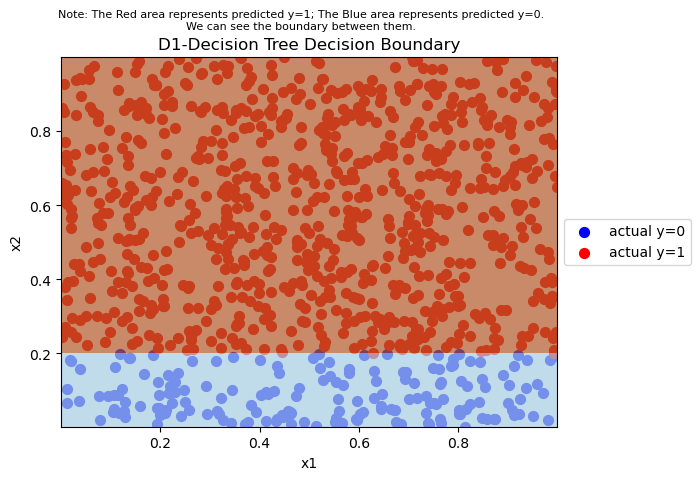

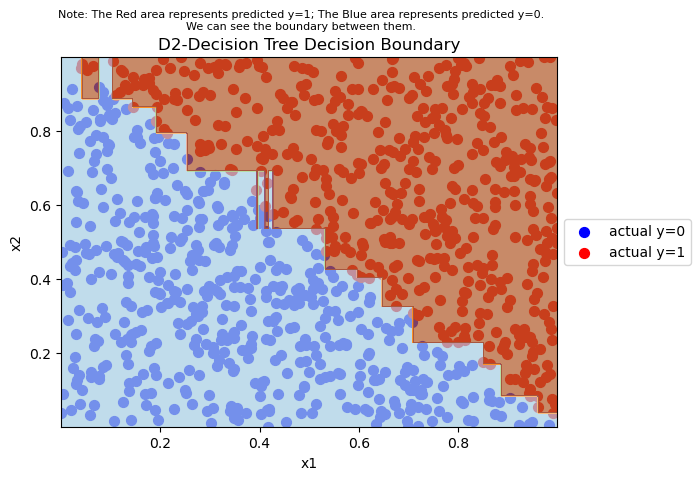

In [51]:
draw_Boundry(D1,D1root,"D1")
draw_Boundry(D2,D2root,"D2")

For D1.txt, the decision boundary is a simple horizontal line, whereas for D2.txt, it forms a diagonal ladder-like pattern. It's evident that the size of the decision tree generated for D2 is much larger compared to D1. Our decision tree algorithm defines splits based on a single feature at each node and continues splitting until certain conditions are met. Specifically, it stops when a node becomes empty or when the entropy of all candidate splits becomes zero. For datasets like D1, our algorithm stops at the first split, showing the the hypothesis space of a decision tree could limit its effectiveness for some datasets.

7.

In [52]:
DbigFile = "./Homework 2 data/Dbig.txt"
Dbig = pd.read_csv(DbigFile, sep=" ", names= ["x1","x2","y"])
randomDbig = Dbig.sample(frac= 1).reset_index(drop=True)
trainDbig = randomDbig[:8192]
testDbig = randomDbig[8192:].reset_index(drop=True)

# Five nested trainning set
sizes = [32, 128, 512, 2048, 8192]
nestedTrainSets = []
for size in sizes:
    nestedTrainSets.append(trainDbig[:size])

#  test set error errn fucntion
def test_error(trained_tree_root, testData):
    wrong_predict =0
    for i,row in testData.iterrows():
        if(i < len(testData)):
            if predict_class(trained_tree_root, row[["x1","x2"]]) != row["y"]:
                wrong_predict +=1
    if len(testData) ==0:
        return 0.0
    return wrong_predict / len(testData)

(1) List n, number of nodes in that tree, errn.

In [53]:
test_error_set = []
train_root =[]
for set in nestedTrainSets:
    root = makeSubtree(set)
    train_root.append(root)
    err = test_error(root,testDbig)
    test_error_set.append(err)
    print(f"n:{len(set)},  number of nodes in the tree:{root.size()},  errn:{err}")

n:32,  number of nodes in the tree:15,  errn:0.12942477876106195
n:128,  number of nodes in the tree:23,  errn:0.06969026548672566
n:512,  number of nodes in the tree:59,  errn:0.06360619469026549
n:2048,  number of nodes in the tree:133,  errn:0.03871681415929203
n:8192,  number of nodes in the tree:271,  errn:0.019358407079646017


(2) Plot n vs. errn. This is known as a learning curve (a single plot)

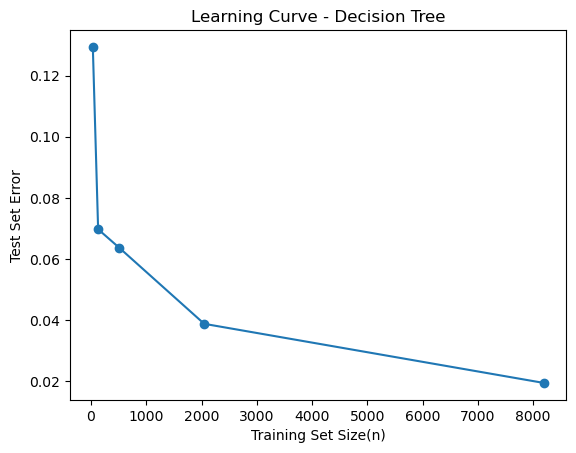

In [54]:
plt.plot(sizes,test_error_set,marker = "o")
plt.xlabel("Training Set Size(n)")
plt.ylabel("Test Set Error")
plt.title('Learning Curve - Decision Tree')
plt.show()


(3) Visualize your decision trees’ decision boundary (five plots).

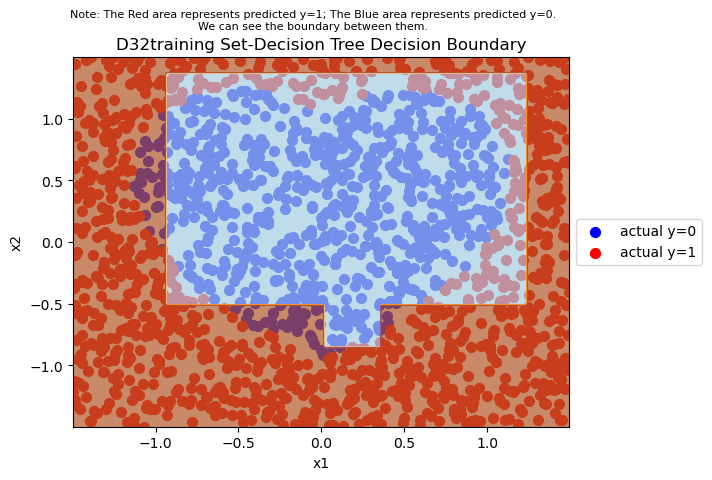

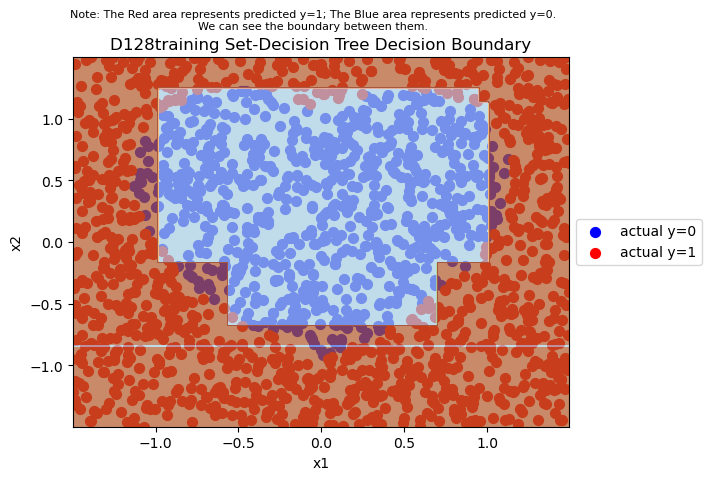

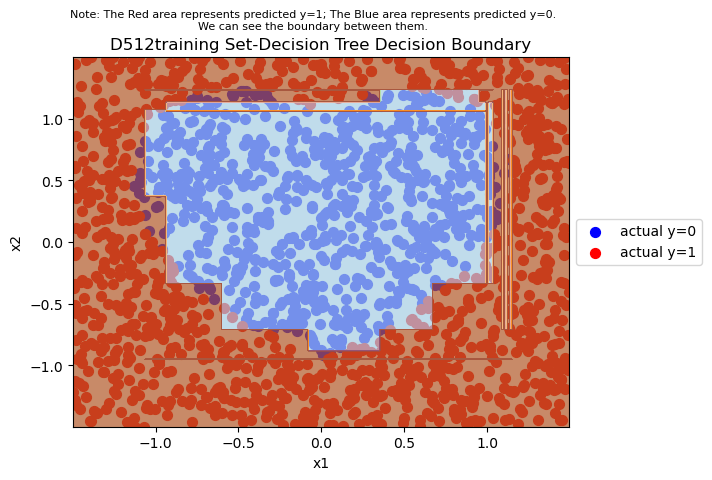

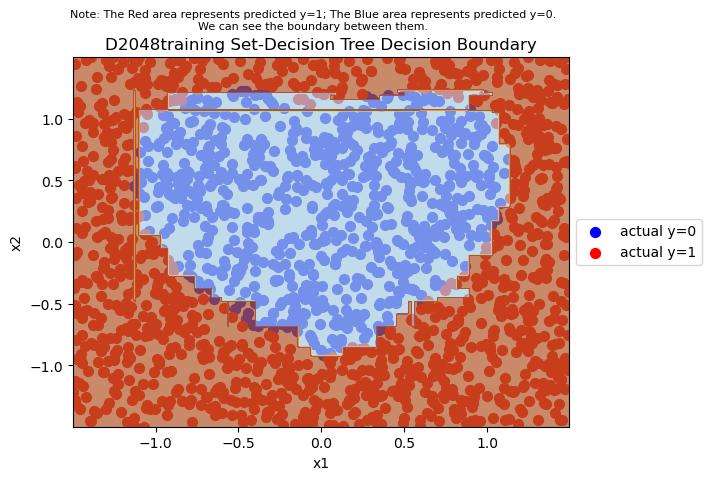

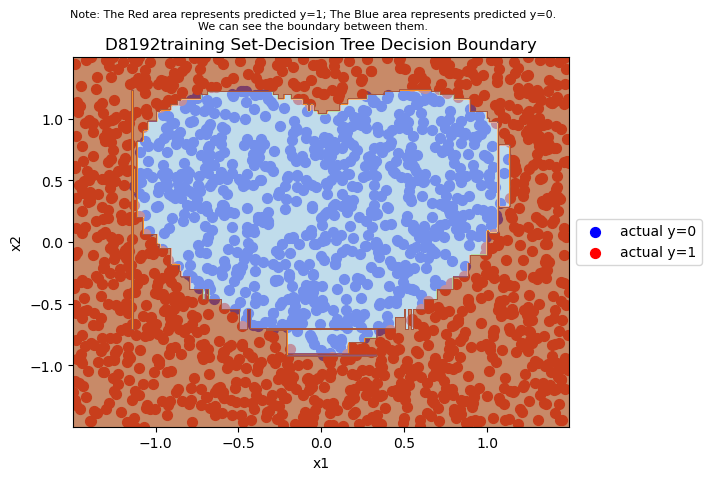

In [55]:
for size, root in zip(sizes, train_root):
    draw_Boundry(testDbig,root,f"D{size}training Set")

# Q3

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

(1) List n, number of nodes in that tree, errn.

In [57]:
error_set = []
DTclf = DecisionTreeClassifier(random_state=0)
for set in nestedTrainSets:
    DTclf.fit(set[["x1","x2"]],set["y"])
    predict_y = DTclf.predict(testDbig[["x1","x2"]])
    err = 1- accuracy_score(testDbig["y"],predict_y)
    error_set.append(err)
    print(f"n:{len(set)},  number of nodes in the tree:{DTclf.tree_.node_count},  errn:{err}")

n:32,  number of nodes in the tree:17,  errn:0.11338495575221241
n:128,  number of nodes in the tree:23,  errn:0.08185840707964598
n:512,  number of nodes in the tree:59,  errn:0.05475663716814161
n:2048,  number of nodes in the tree:111,  errn:0.026548672566371723
n:8192,  number of nodes in the tree:239,  errn:0.013274336283185861


(2) Plot n vs. errn.

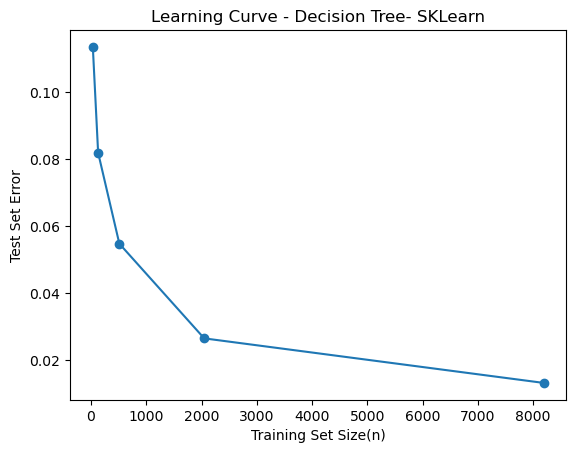

In [58]:
plt.plot(sizes,error_set, marker= "o")
plt.xlabel("Training Set Size(n)")
plt.ylabel("Test Set Error")
plt.title('Learning Curve - Decision Tree- SKLearn')
plt.show()

# Q4

In [59]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

In [60]:
# generate 100 samples from uniform distribution [0,2Pi]
x_train = np.random.uniform(0, 2*np.pi, 100)
y_train = np.sin(x_train)

# train samples use lagrange_interpolation
lgr = lagrange(x_train,y_train)

# generate test set
x_test = np.random.uniform(0, 2*np.pi, 100)
y_test = np.sin(x_test)

y_test_predict = lgr(x_test)
y_train_predict = lgr(x_train)

train_LogMSE = np.log(np.mean((y_train-y_train_predict)**2))
test_LogMSE = np.log(np.mean((y_test-y_test_predict)**2))

print(f"Train error(Log of MSE) : {train_LogMSE}")
print(f"Test error(Log of MSE) : {test_LogMSE}")

Train error(Log of MSE) : 336.4325226160335
Test error(Log of MSE) : 333.7216036200583


We can observe that both error are super high which is not nomal. It's because we trained too many samples for the Lagrange Interpolation model as scipy warns "Do not expect to be able to use more than about 20 points even if they are chosen optimally".
A small change of x can result in huge fluctuations in the polynomial coefficients, which may be a reason of high MSE.

In [61]:
var = np.arange(0,30,0.5)
epsilons = [ np.random.normal(0, v, 100) for v in var]

train_LogMSE_set = []
test_LogMSE_set = []

for epsilon in epsilons:
    new_x_train = x_train +epsilon
    new_y_train = np.sin(new_x_train)
    new_lgr = lagrange(new_x_train,new_y_train)
    new_y_test_predict = new_lgr(x_test)
    new_y_train_predict = new_lgr(new_x_train)
    new_train_LogMSE = np.log(np.mean((new_y_train-new_y_train_predict)**2))
    new_test_LogMSE = np.log(np.mean((y_test-new_y_test_predict)**2))
    train_LogMSE_set.append(new_train_LogMSE)
    test_LogMSE_set.append(new_test_LogMSE)

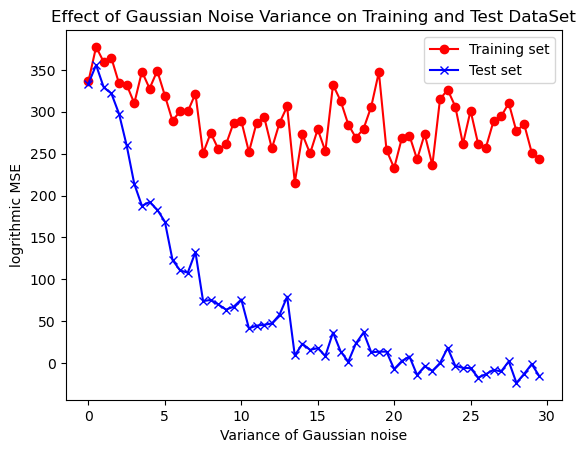

In [62]:
plt.plot(var,train_LogMSE_set,color = "red", marker="o", label="Training set")
plt.plot(var,test_LogMSE_set,color = "b", marker="x", label="Test set")
plt.xlabel("Variance of Gaussian noise")
plt.ylabel("logrithmic MSE")
plt.legend()
plt.title("Effect of Gaussian Noise Variance on Training and Test DataSet")
plt.show()

When the variance of Gaussian nose is larger, our trainning set is "fatter" distributed, which lead to the both training set and test set reduce on MSE (significantly on test set). It probably indicates that modeling errors or fluctuations due to the many equidistant data points used in Lagrange interpolation could be masked by noise to some extent.